In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#loading the dataset 
dataset = pd.read_csv("creditcard.csv")
#separating independent and dependent features 
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = [0,-1]
x_train[:,col_to_scale] = sc.fit_transform(x_train[:,col_to_scale])
x_test[:,col_to_scale] = sc.transform(x_test[:,col_to_scale])

In [26]:
#training the model using random forest classifier 
#hyperparameter tuning 
n_estimators = [50,100,150,200]
max_depth = [5,15,25,30]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
max_features = ["sqrt","log2"]
max_samples = [0.5,0.6,0.7,0.8,0.9,1.0]
parameters = {"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"max_features":max_features,"max_samples":max_samples}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=1)
random_search = RandomizedSearchCV(estimator=rf,param_distributions=parameters,n_iter=10,scoring="precision",n_jobs=-1,cv=3,verbose=2,random_state=1)
random_search.fit(x_train,y_train)
#getting best parameters and score 
print(f"best parameters are:{random_search.best_params_}")
print(f"best score is:{random_search.best_score_}")
#training the model using best parameters 
rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=25, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  24.8s
[CV] END max_depth=25, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  25.7s
[CV] END max_depth=5, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  43.6s
[CV] END max_depth=5, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  43.6s
[CV] END max_depth=5, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  44.1s
[CV] END max_depth=25, max_features=log2, max_samples=0.5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  27.2s
[CV] END max_depth=25, max_features=sqrt, max_samples=0.6, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

In [ ]:
#getting test set results 
y_pred = rf.predict(x_test)
#getting evaluation metrices 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
print(f"accuracy score is:{accuracy_score(y_test,y_pred)}")
print(f"precision score is:{precision_score(y_test,y_pred)}")
print(f"f1 score is:{f1_score(y_test,y_pred)}")

accuracy score is:0.9994557775359011
confusion matrix is:[[56871     4]
 [   27    60]]
precision score is:0.9375
f1 score is:0.7947019867549668


In [28]:
from sklearn.metrics import recall_score, roc_auc_score, precision_recall_curve, auc
print(f"Recall score is: {recall_score(y_test, y_pred)}")
y_prob = rf.predict_proba(x_test)[:,1]  # probability of fraud class
print(f"ROC AUC is: {roc_auc_score(y_test, y_prob)}")
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC is: {pr_auc}")

Recall score is: 0.6896551724137931
ROC AUC is: 0.9507259820639131
PR AUC is: 0.7505031731223751


In [29]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}")
print(f"False Negatives: {fn}, True Positives: {tp}")

True Negatives: 56871, False Positives: 4
False Negatives: 27, True Positives: 60


Exception ignored in: <function ResourceTracker.__del__ at 0x107c69bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1072ddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105069bc0>
Traceback (most recent call last

/var/folders/mh/7th852z51ljdlszsvgw4ht780000gn/T/ipykernel_5393/2462358053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


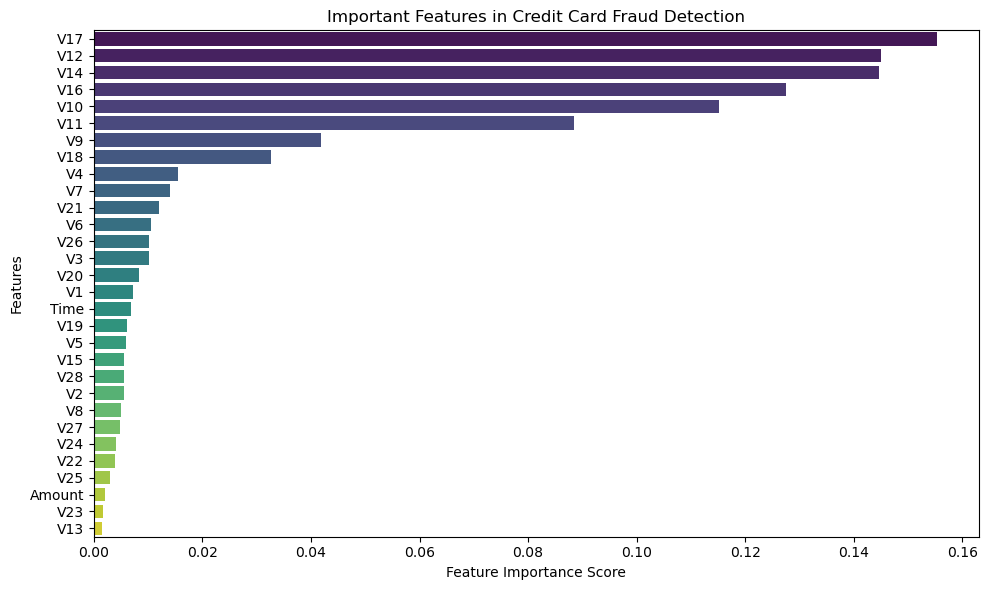

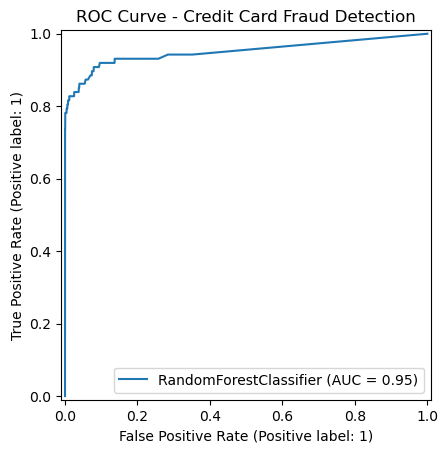

Model saved as credit_card_fraud_model.pkl


In [30]:
#features importance 
importances = rf.feature_importances_
feature_names = dataset.columns[:-1]  # all columns except 'Class'
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Important Features in Credit Card Fraud Detection")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
#ROC curve 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, x_test, y_test)
plt.title("ROC Curve - Credit Card Fraud Detection")
plt.show()
#saving trained model 
import joblib
joblib.dump(rf, "credit_card_fraud_model.pkl")
print("Model saved as credit_card_fraud_model.pkl")
